In [2]:
import torch

# Generate 1000 samples for class-0 from a 0 mean, unit variance Gaussian distribution
samples_class_0 = torch.randn(1000, 2)

# Generate 1000 samples for class-1 from a Gaussian distribution with mean [2, 2] and unit variance
mean_class_1 = torch.tensor([2.0, 2.0])
samples_class_1 = torch.randn(1000, 2) + mean_class_1

# To display the first few samples from each class
print("Class-0 samples:\n", samples_class_0[:5])
print("\nClass-1 samples:\n", samples_class_1[:5])


Class-0 samples:
 tensor([[ 0.1347, -1.0041],
        [-0.6442, -0.0717],
        [-1.6166,  0.1729],
        [ 1.9400,  0.7555],
        [-0.3730,  0.5848]])

Class-1 samples:
 tensor([[2.3349, 2.0190],
        [3.8905, 2.0715],
        [1.2154, 1.9400],
        [2.3791, 1.9510],
        [3.6675, 2.7510]])


In [3]:
from torch.utils.data import TensorDataset, DataLoader, random_split

# Create tensors for the samples and labels for both classes
samples = torch.cat((samples_class_0, samples_class_1), 0)
labels = torch.cat((torch.zeros(1000, 1), torch.ones(1000, 1)), 0)

# Create a TensorDataset to hold samples and labels
dataset = TensorDataset(samples, labels)

# Calculate the sizes for train and test sets
total_size = len(dataset)
test_size = int(0.1 * total_size)
train_size = total_size - test_size

# Randomly split the dataset into train and test sets
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Input to output linear transformation

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))  # Apply sigmoid to linear output
        return outputs


In [16]:
# Assuming each sample has 2 features (input_size=2)
input_size = 2
model = LogisticRegression(input_size)

# Binary Cross-Entropy loss function
criterion = nn.BCELoss()

# Optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.1)


In [17]:
# List to store loss values
loss_values = []

# Convert train_dataset to DataLoader for mini-batch processing
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

num_epochs = 100

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Ensure inputs and labels are float for operations
        inputs, labels = inputs.float(), labels.float()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Append the loss value
        loss_values.append(loss.item())

    # Print loss every few epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.2661
Epoch [20/100], Loss: 0.2460
Epoch [30/100], Loss: 0.2862
Epoch [40/100], Loss: 0.0670
Epoch [50/100], Loss: 0.0421
Epoch [60/100], Loss: 0.3083
Epoch [70/100], Loss: 0.0722
Epoch [80/100], Loss: 0.3056
Epoch [90/100], Loss: 0.0908
Epoch [100/100], Loss: 0.1141


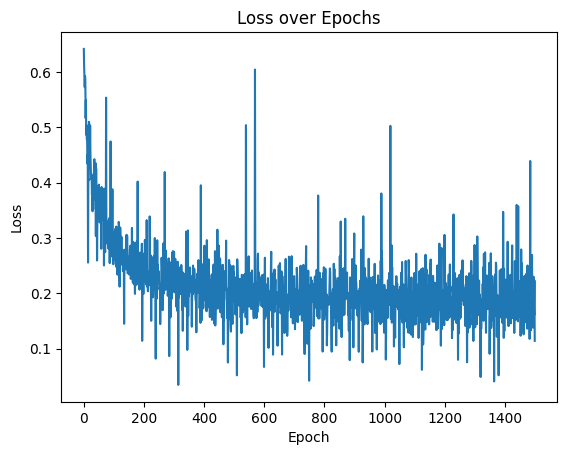

In [18]:
import matplotlib.pyplot as plt

# Plotting the loss values
plt.plot(loss_values)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [19]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure the model is in evaluation mode
model.eval()

# Create a DataLoader
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Lists to store true labels and predictions
true_labels = []
predictions = []

# No need to track gradients for evaluation
with torch.no_grad():
    for inputs, labels in test_loader:
        # Forward pass
        outputs = model(inputs)

        # Convert outputs to predictions: 0 if output < 0.5, 1 if output >= 0.5
        predicted_labels = (outputs >= 0.5).long()

        # Store predictions and true labels
        predictions.extend(predicted_labels.flatten().cpu().numpy())
        true_labels.extend(labels.flatten().cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions, zero_division=0)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.92
Precision: 0.9174311926605505
Recall: 0.9345794392523364
F1 Score: 0.925925925925926


In [23]:
predicted_labels.flatten().shape
#predicted_labels.view(-1).shape


torch.Size([8])